![Clustering](https://data.landportal.info/sites/landportal.org/files/styles/width280/public/1518613180-ut-en.png?itok=fSpTrIFL)
# Artificial Intelligence Course 2024
by Dr. Fadaei and Dr. Yaghoobzaadeh

Computer Assignment 3 - Clustering on images





# Mohammad Taha Majlesi
810101504

# Project Introduction: Image Clustering Analysis of Flower Species



Overview


in this project we have Dataset of around 200 pictures  and we want to cluster them based on their similarity.
we have some lables for each picture and we want to see if the clustering algorithm can cluster them based on their lables or not.

This project focuses on the application of clustering algorithms to analyze and classify various species of flowers based on their images. Clustering, a form of unsupervised learning, involves grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar to each other than to those in other groups. Our objective is to segment these flower images into distinct clusters that accurately reflect their inherent similarities.

Dataset
The dataset for this project includes a collection of color images of different flower species. Accompanying these images, there is a CSV file containing labels associated with each image. These labels will play a crucial role in the evaluation phase of our clustering outcomes.

Feature Extraction
The first technical step involves extracting features from the images using the VGG16 model, a pre-trained Convolutional Neural Network. By removing the fully connected layers, we focus on using the model to generate a rich set of features from each image, which serve as the basis for our clustering analysis.

Clustering Implementation
We will implement clustering using methods like K-Means and DBSCAN. Adjusting the parameters of these models through trial and error, we aim to find the optimal clustering arrangement. Special attention is required in choosing the right number of clusters (K) for K-Means, which is critical for achieving meaningful clustering results.

Dimensionality Reduction
To aid in visualizing the high-dimensional feature vectors derived from the images, we employ dimensionality reduction techniques such as PCA (Principal Component Analysis). This step will simplify our data representation, making it possible to visually assess and compare the clustering outcomes.

Evaluation and Analysis
The project concludes with an evaluation of the clustering models using metrics like homogeneity and silhouette scores. These metrics help in quantifying the effectiveness of our clustering approach, providing insights into how closely the clusters represent the true categories of the dataset.


## Preprocessing and Feature Extraction

#### Preprocessing
Before we can analyze the images using machine learning algorithms, we need to standardize and prepare the data. This preprocessing step ensures that the input images are in a format suitable for feature extraction and further analysis. Here are the key preprocessing steps:

1. **Resizing Images**: To ensure consistency across all inputs, resize all images to a fixed size. This is crucial because the feature extraction model (VGG16) requires input images of the same dimensions.

2. **Normalization**: Normalize the pixel values of the images to a range of 0 to 1. This step is important as it helps in speeding up the convergence during training by changing the scales of inputs to be uniform.

3. **Color Consistency**: Although the images are already in color, ensuring consistent color space conversion (e.g., RGB to BGR) might be required depending on the specifics of the preprocessing pipeline used in VGG16.

#### Feature Extraction Using VGG16
Feature extraction converts raw image data into a meaningful set of features using a pre-trained model. The VGG16 model, which is a deep convolutional network known for its effectiveness in image recognition tasks, will be employed here. The steps include:

1. **Using Pre-trained VGG16**: Load the VGG16 model pre-trained on the ImageNet dataset. This model has learned rich feature representations for a wide range of images.

2. **Removing Fully Connected Layers**: Strip the fully connected layers from the VGG16 model. This modification converts the network into a feature extractor, allowing us to output a feature map rather than a classification result.

3. **Extracting Features**: Pass the preprocessed images through this modified network. The output will be a set of feature vectors for each image. Each vector encapsulates the essential characteristics of the image as perceived by the network, which are crucial for the clustering phase.

#### Reasons for Feature Extraction
- **High-Level Representation**: Directly clustering raw pixel data is often ineffective due to the high dimensionality and noise. Feature extraction allows us to use more abstract representations where similar images have similar high-level features.
- **Reduction of Dimensionality**: The feature vectors produced by VGG16 are of much lower dimension compared to raw image data, making subsequent clustering computationally more efficient and often more effective.
- **Transfer Learning**: Leveraging a pre-trained model like VGG16 utilizes the knowledge gained from a vast and diverse dataset (ImageNet), which can help in better generalization even with a smaller dataset of flower images.



# Part 1 : Implementing the Clustering Algorithm

# Hyper Parameters

In [29]:
!unzip flower_images.zip



Archive:  flower_images.zip
replace flower_images/0001.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace flower_images/0002.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace flower_images/0002.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n a
replace flower_images/0003.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: n A
replace flower_images/0004.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: flower_images/0004.png  
  inflating: flower_images/0005.png  
  inflating: flower_images/0006.png  
  inflating: flower_images/0007.png  
  inflating: flower_images/0008.png  
  inflating: flower_images/0009.png  
  inflating: flower_images/0010.png  
  inflating: flower_images/0011.png  
  inflating: flower_images/0012.png  
  inflating: flower_images/0013.png  
  inflating: flower_images/0014.png  
  inflating: flower_images/0015.png  
  inflating: flower_images/0016.png  
  inflating: flower_images/0017.png  
  inflating: flower_images/0018.png  
  inflati

## extract features from the images using VGG16

at first we need to extract features from the images using VGG16 model.
its helps us to reduce the dimensionality of the images and extract some features from them.
and then we can use these features to cluster the images based on them.

it may take some time to done .

In [100]:

import os
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)

def extract_features(img_path, model) :
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    features = model.predict(img)
    return features

img_dir = 'flower_images'

features = []
for img_name in os.listdir(img_dir):
    if img_name == "flower_labels.csv":
        continue
    img_path = os.path.join(img_dir, img_name)
    img_features = extract_features(img_path, model)
    features.append(img_features)

features = np.array(features)
features = features.reshape(features.shape[0], -1)

print(features.shape)

1/1 [==============================] - 1s 796ms/step
(210, 25088)


In [101]:
print(features.shape)



(210, 25088)


The shape of the feature array `(210, 25088)` you obtained from running the feature extraction script using the VGG16 model provides some important details about your dataset and the features extracted. Here's a breakdown:

### Description of the Features Array Shape

1. **Number of Images: 210**
   - The first dimension of the array, `210`, represents the number of images that have been processed. This indicates that you have 210 images in your `flower_images` directory (excluding the `flower_labels.csv` file), and each image has been processed to extract features.

2. **Number of Features per Image: 25,088**
   - The second dimension, `25088`, represents the number of features extracted from each image. When using VGG16 with `include_top=False`, the model outputs a feature map from its final convolutional layer. Because you did not include the fully connected layers of VGG16, the output you get is the raw features from the last convolutional layer, which in the case of VGG16 outputting from the last pooling layer (usually the 5th pooling layer when `include_top=False` is used) results in a tensor output shape based on the input image size and the architecture of the network.

### Why 25,088 Features?
- The VGG16 model architecture, when used without the top fully connected layers and for an input image size of 224x224 pixels, processes the image through several convolutional and pooling layers. The output from the last pooling layer in this configuration results in a feature map of size `7x7` for each of the 512 filters in that layer. Multiplying these values gives the total number of features per image:
  - Feature map size from the last layer: `7x7 = 49`
  - Number of channels (filters) at the output of the last convolutional block: `512`
  - Total features per image: `49 * 512 = 25,088`

### Implications for Clustering
- **High-Dimensional Data**: Each image is represented by a 25,088-dimensional vector. Clustering in such a high-dimensional space can be challenging due to the curse of dimensionality, which might affect the performance of some clustering algorithms.
- **Need for Dimensionality Reduction**: To effectively cluster these images, you might consider using dimensionality reduction techniques such as PCA (Principal Component Analysis) or t-SNE before applying clustering algorithms. This step can help to reduce noise, improve clustering algorithm performance, and make visualization feasible.


# reduce the dimensionality of the features by CPA

we can use PCA to reduce the dimensionality of the features.

About CPA :

Principal Component Analysis (PCA) is considered an algorithm, specifically a statistical algorithm, used for dimensionality reduction in fields such as machine learning, statistics, and data analysis. It identifies the axes (principal components) that maximize the variance in the data, allowing for a lower-dimensional representation of the dataset while preserving as much of the variance (information) as possible.

### Key Points about PCA:

- **Eigenvalue Decomposition:** At its core, PCA involves computing the eigenvalues and eigenvectors of a dataset's covariance matrix. These eigenvalues and eigenvectors are then used to transform the original variables into new, uncorrelated variables (the principal components).

- **Dimensionality Reduction:** By selecting the principal components with the largest eigenvalues, you can reduce the dimensionality of the data while retaining most of the variance. This is particularly useful for visualization, noise reduction, and efficiency improvements in machine learning algorithms.

- **Versatility:** While PCA is widely used in quantitative fields for analyzing data, it also forms the basis for many machine learning and data preprocessing techniques. Its ability to uncover the underlying structure of data and reduce dimensions without losing significant information makes it a powerful tool for exploratory data analysis and preprocessing.

- **Algorithmic Steps:** PCA involves several computational steps, including standardizing the data, computing the covariance matrix, performing eigenvalue decomposition, and finally, projecting the data onto the principal components.

Despite its simplicity and age, PCA remains a fundamental and widely used algorithm for data analysis and preprocessing, owing to its effectiveness and the interpretability of its results.

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_pca[:, 0], features_reduced_pca[:, 1])
plt.title("PCA reduced feature visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

NameError: name 'features' is not defined



### Clustering Flower Images with K-Means

In this section of our analysis, we apply the K-Means clustering algorithm to group the flower images based on their extracted features. K-Means is a popular unsupervised learning algorithm that partitions the data into K distinct clusters by minimizing the variance within each cluster. The goal is to find clusters of images that are similar to each other but different from images in other clusters.

#### Implementation Steps:
1. **Setting Up K-Means**:
   - We use the `KMeans` class from `scikit-learn` to create a K-Means clustering model.
   - `n_clusters=k`: We specify the number of clusters. For this example, we've chosen `k=10`, hypothesizing that there are 10 distinct types of flowers in our dataset.
   - `random_state=100`: This parameter ensures reproducibility of our results by initializing the centroid positions in a consistent manner each time the algorithm is run.

2. **Fitting the Model**:
   - The `fit_predict` method is applied to the PCA-reduced features, `features_reduced_pca`, which contains the lower-dimensional representation of our original high-dimensional image features. This reduction helps in mitigating the curse of dimensionality and enhances clustering performance.
   - The output, `clusters_KMeans`, is an array where each element corresponds to the cluster assignment of each image.

3. **Loading Ground Truth Labels**:
   - We load the actual labels of the images from a CSV file to compare the clusters formed by K-Means with the true categories of the flowers. These labels serve as a ground truth for evaluation.

4. **Evaluating the Clusters**:
   - **Homogeneity Score**: We calculate the homogeneity score using `homogeneity_score` from `scikit-learn`. This metric assesses if all of its clusters contain only data points which are members of a single class.
   - **Silhouette Score**: We compute the silhouette score using `silhouette_score`, also from `scikit-learn`. This measure evaluates how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that the clusters are well apart from each other and clearly defined.

By the end of this section, we will have an understanding of how well the K-Means clustering managed to organize the images into meaningful groups and how these groups correspond to the true classifications of the flowers.


In [103]:
from sklearn.cluster import KMeans

k = 10

kmeans = KMeans(n_clusters=k, random_state=100)
clusters_KMeans = kmeans.fit_predict(features_reduced_pca)

print(clusters_KMeans)



[2 7 5 5 9 2 1 5 5 9 7 2 9 2 0 2 2 8 0 1 2 6 8 9 2 5 0 7 5 7 2 0 0 2 6 0 9
 5 7 0 6 2 9 4 7 7 2 4 2 1 4 1 9 0 7 6 3 2 7 9 4 2 0 0 2 2 2 7 7 0 1 8 0 7
 7 9 5 0 5 2 0 0 4 0 2 1 6 3 7 9 7 7 2 7 1 6 0 1 0 4 5 3 5 3 5 8 4 2 5 0 2
 0 7 9 7 2 9 5 7 1 2 6 6 2 0 4 7 2 2 7 3 1 5 7 2 2 0 7 3 2 0 7 0 7 5 1 4 0
 5 0 2 9 9 2 9 9 7 2 6 7 0 7 0 7 7 5 7 6 8 2 2 9 5 2 9 7 6 2 7 5 5 5 5 3 2
 2 7 2 9 4 1 0 0 2 7 5 1 2 3 9 4 3 7 5 7 2 0 1 0 7]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [104]:
#load from the csv file
import pandas as pd

# load the labels from the csv file
labels = pd.read_csv(os.path.join(img_dir, 'flower_labels.csv'))

# calculate the homogeneity score
from sklearn.metrics import homogeneity_score
homogeneity = homogeneity_score(labels['label'], clusters_KMeans)

# calculate the silhouette score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(features_reduced_pca, clusters_KMeans)

print(f'Homogeneity Score: {homogeneity}')
print(f'Silhouette Score: {silhouette}')


Homogeneity Score: 0.10711550629187754
Silhouette Score: 0.39694440364837646


In [105]:
labels['label']

0      0
1      0
2      2
3      0
4      0
      ..
205    6
206    0
207    4
208    6
209    1
Name: label, Length: 210, dtype: int64

K=2, Homogeneity Score=0.017127523221896243
K=3, Homogeneity Score=0.0258598648611475
K=4, Homogeneity Score=0.04810829320665534
K=5, Homogeneity Score=0.05367596931746885
K=6, Homogeneity Score=0.07180388467007126
K=7, Homogeneity Score=0.0752481912382557


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K=8, Homogeneity Score=0.08630330141167937
K=9, Homogeneity Score=0.10083611367613173
K=10, Homogeneity Score=0.10711550629187754
K=11, Homogeneity Score=0.12459932710852688
K=12, Homogeneity Score=0.13585227084510346
K=13, Homogeneity Score=0.14563772787115475


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K=14, Homogeneity Score=0.15308848235474418
K=15, Homogeneity Score=0.14846868372492497
K=16, Homogeneity Score=0.16272368438415605
K=17, Homogeneity Score=0.18162998908506897


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=18, Homogeneity Score=0.17757486635150965
K=19, Homogeneity Score=0.19433710155113265
K=20, Homogeneity Score=0.19098898786556368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


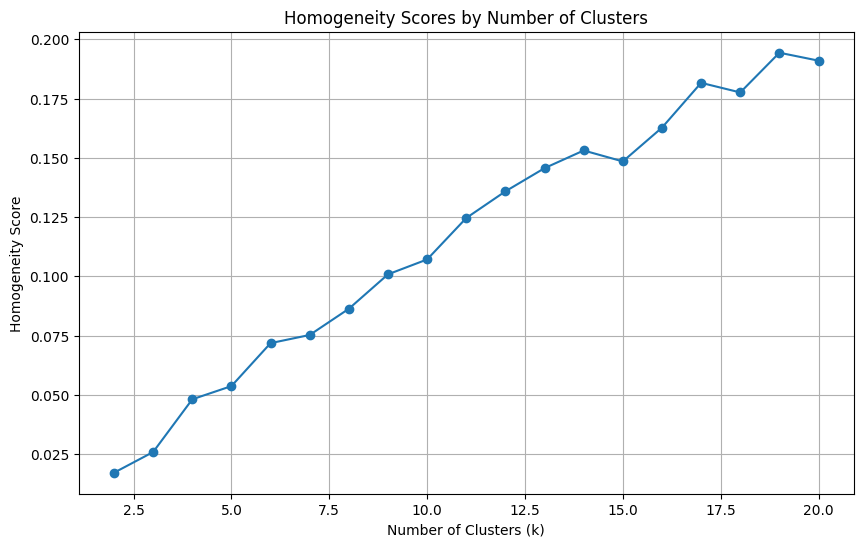

In [106]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score
import matplotlib.pyplot as plt

# Assuming features_reduced_pca is your dataset ready for clustering

# Load the true labels
labels = pd.read_csv(os.path.join(img_dir, 'flower_labels.csv'))

# Define the range of k to try
k_values = range(2, 21)  # for example, from 2 to 20
homogeneity_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=100)
    clusters = kmeans.fit_predict(features_reduced_pca)
    score = homogeneity_score(labels['label'], clusters)
    homogeneity_scores.append(score)
    print(f"K={k}, Homogeneity Score={score}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Scores by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Homogeneity Score')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K=2, Silhouette Score=0.5981054306030273
K=3, Silhouette Score=0.5487921833992004
K=4, Silhouette Score=0.5605874061584473
K=5, Silhouette Score=0.4023221433162689
K=6, Silhouette Score=0.40506410598754883
K=7, Silhouette Score=0.40520524978637695
K=8, Silhouette Score=0.4067324101924896
K=9, Silhouette Score=0.4115685522556305


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

K=10, Silhouette Score=0.39694440364837646
K=11, Silhouette Score=0.3839041590690613
K=12, Silhouette Score=0.3773089051246643
K=13, Silhouette Score=0.3893071413040161
K=14, Silhouette Score=0.36719417572021484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=15, Silhouette Score=0.3998105227947235
K=16, Silhouette Score=0.367478609085083
K=17, Silhouette Score=0.37553438544273376
K=18, Silhouette Score=0.37768542766571045


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=19, Silhouette Score=0.36186885833740234
K=20, Silhouette Score=0.3790891766548157


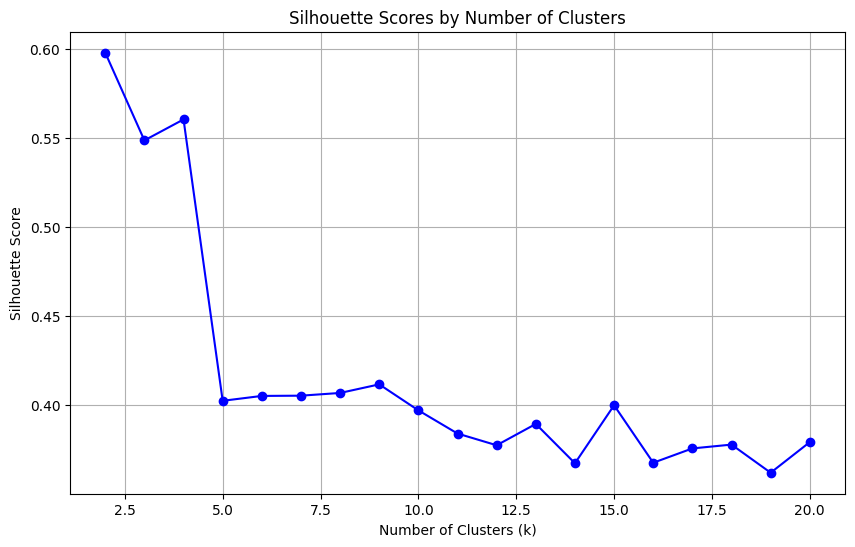

In [107]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming features_reduced_pca is your dataset ready for clustering
# features_reduced_pca = # your PCA-reduced features here

# Define the range of k to try
k_values = range(2, 21)  # typically starting from 2 because silhouette score cannot be calculated for k=1
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=100)
    clusters = kmeans.fit_predict(features_reduced_pca)
    score = silhouette_score(features_reduced_pca, clusters)
    silhouette_scores.append(score)
    print(f"K={k}, Silhouette Score={score}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', color='blue')
plt.title('Silhouette Scores by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


## Plut results
This code creates a visual representation of data clusters in a two-dimensional space reduced by PCA. Here's how it works:

1. **Setting Up the Plot**:
   - The plot is set up with a size of 10 inches by 8 inches to clearly display the clusters.

2. **Plotting Each Cluster**:
   - A loop iterates through each cluster (0 to 9, assuming 10 clusters in total).
   - For each cluster, the code plots points in a scatter plot where the x and y coordinates correspond to the first and second principal components of the data.
   - Each cluster is given a unique label (`Cluster 0`, `Cluster 1`, etc.) which helps in identifying it on the plot.

3. **Adding Titles and Labels**:
   - The plot is titled 'Clusters Visualization with PCA' to indicate what the visualization represents.
   - The axes are labeled 'PCA 1' and 'PCA 2', denoting that the plot dimensions are the first two principal components of the data.

4. **Displaying the Plot**:
   - A legend is included to help differentiate the clusters by their respective colors and labels.
   - The `plt.show()` function is called to display the plot.

This visualization is an effective way to see how well the clusters are formed and how they are spaced apart, providing insights into the structure of the data after it has been clustered.

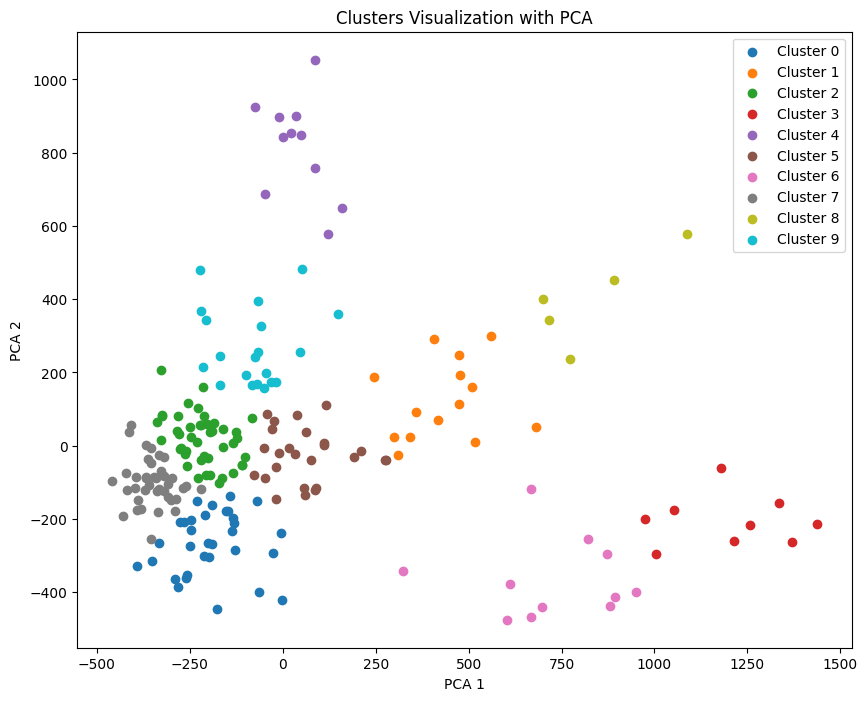

In [108]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(features_reduced_pca[clusters_KMeans == i, 0], features_reduced_pca[clusters_KMeans == i, 1], label=f'Cluster {i}')
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# Desplay the images in sum of clustes by this function

In [109]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
import os

def display_images_from_cluster(cluster_id, clusters, img_dir, img_per_row=5):
    indices = [i for i, cluster in enumerate(clusters) if cluster == cluster_id]

    nrows = len(indices) // img_per_row + (1 if len(indices) % img_per_row else 0)

    fig, axs = plt.subplots(nrows=nrows, ncols=img_per_row, figsize=(15, 3 * nrows))

    axs = axs.ravel()

    for i in range(len(indices), len(axs)):
        axs[i].axis('off')

    for ax, idx in zip(axs, indices):
        img_name = os.listdir(img_dir)[idx]
        img_path = os.path.join(img_dir, img_name)
        img = image.load_img(img_path, target_size=(224, 224))
        ax.imshow(img)
        ax.axis('off')



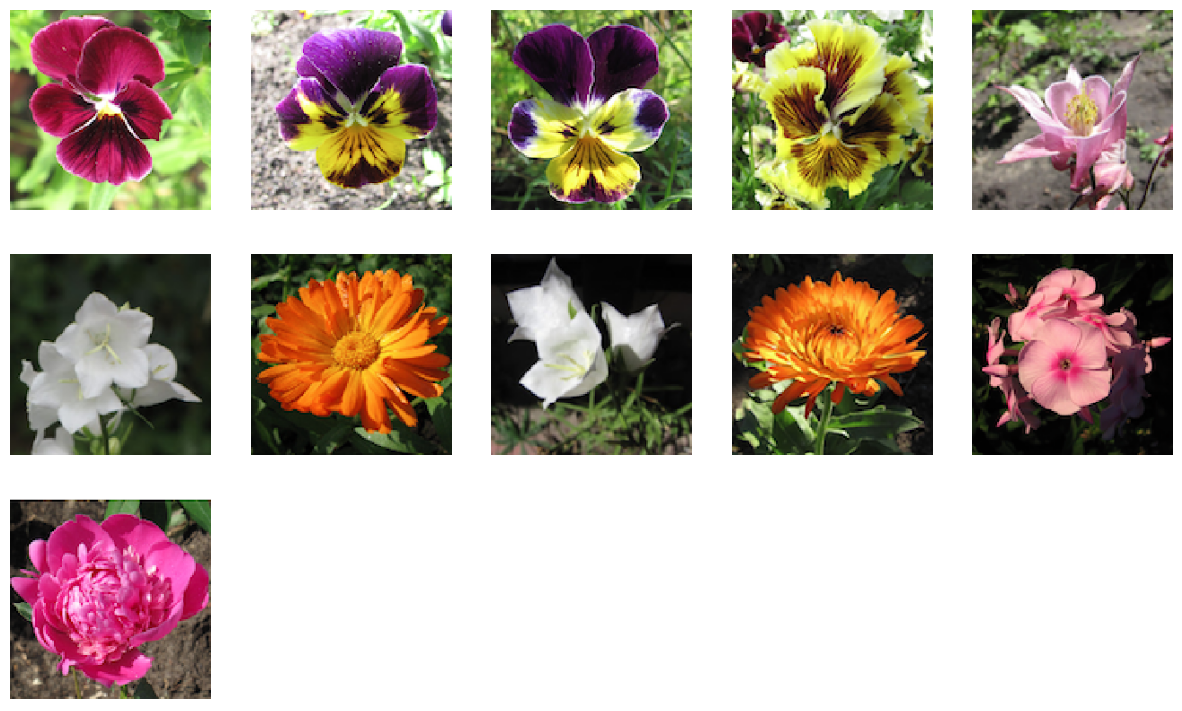

In [110]:
cluster_id_to_display = 4
display_images_from_cluster(cluster_id_to_display, clusters_KMeans, img_dir)


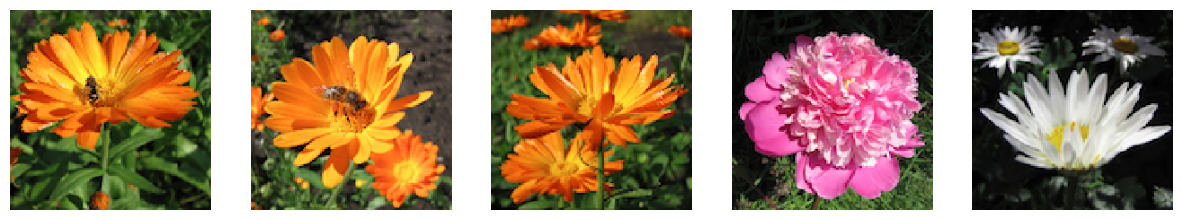

In [122]:
cluster_id_to_display = 8
display_images_from_cluster(cluster_id_to_display, clusters_KMeans, img_dir)


# DBSCAN Clustering

we can also use DBSCAN clustering to cluster the images based on their features.
by skitlearn we can use the DBSCAN clustering algorithm to cluster the images based on their features.

we know that by change the hyperparameters of the DBSCAN clustering algorithm we can get different results.
for example by changing the eps and min_samples hyperparameters we can get different results.


by random we can choose this eps and min_samples

In [ ]:
# clustering the images using DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=90, min_samples=2)
clusters_DBSCAN = dbscan.fit_predict(features_reduced_pca)
print(clusters_DBSCAN)


# Plut results of the DBSCAN clustering algorithm

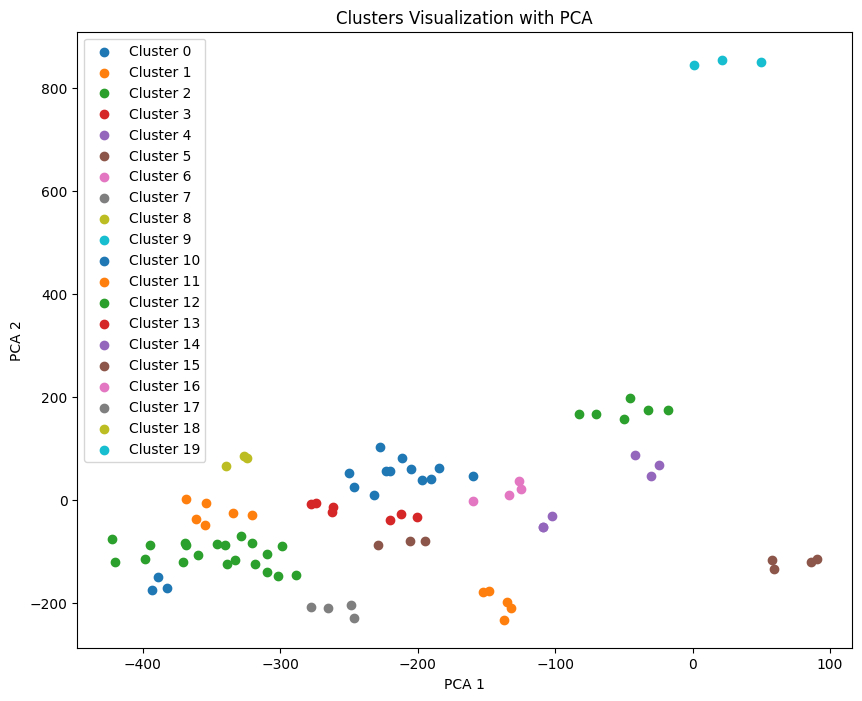

In [141]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



plt.figure(figsize=(10, 8))
for i in range(20):
    plt.scatter(features_reduced_pca[clusters_DBSCAN == i, 0], features_reduced_pca[clusters_DBSCAN == i, 1], label=f'Cluster {i}')
plt.title('Clusters Visualization with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

## DBSCAN Clustering Visualization Across Different eps and min_samples Settings Using PCA-Reduced Features

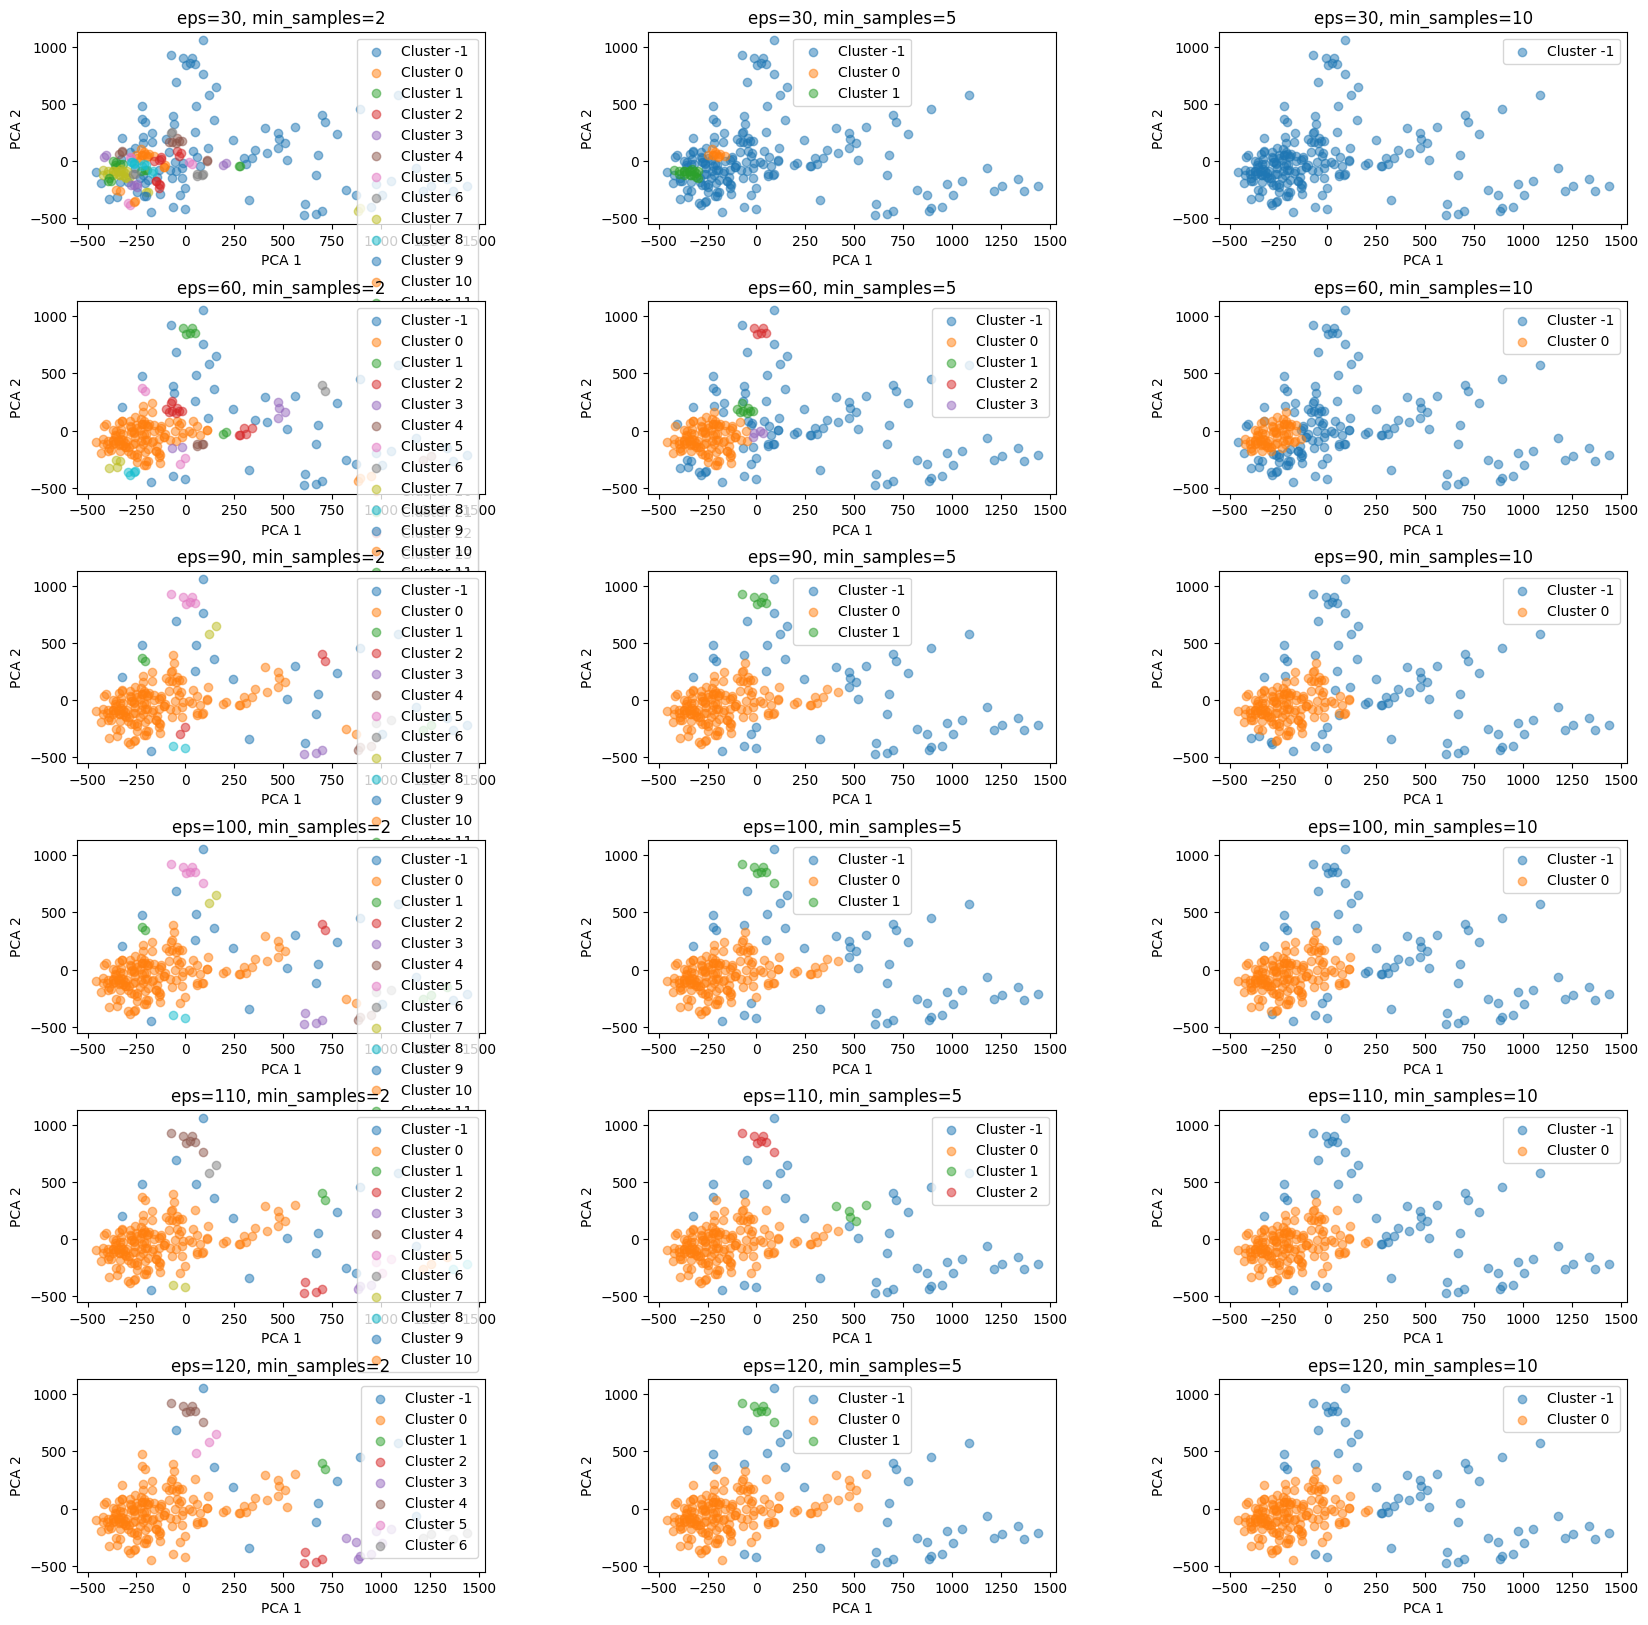

In [142]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

eps_values = [30, 60, 90 , 100 , 110 , 120 ]
min_samples_values = [2, 5, 10]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_reduced_pca)

        ax = axes[i, j]
        for cluster_id in np.unique(clusters):
            ax.scatter(features_reduced_pca[clusters == cluster_id, 0], features_reduced_pca[clusters == cluster_id, 1], label=f'Cluster {cluster_id}', alpha=0.5)
        ax.set_title(f'eps={eps}, min_samples={min_samples}')
        ax.set_xlabel('PCA 1')
        ax.set_ylabel('PCA 2')
        ax.legend()


plt.show()


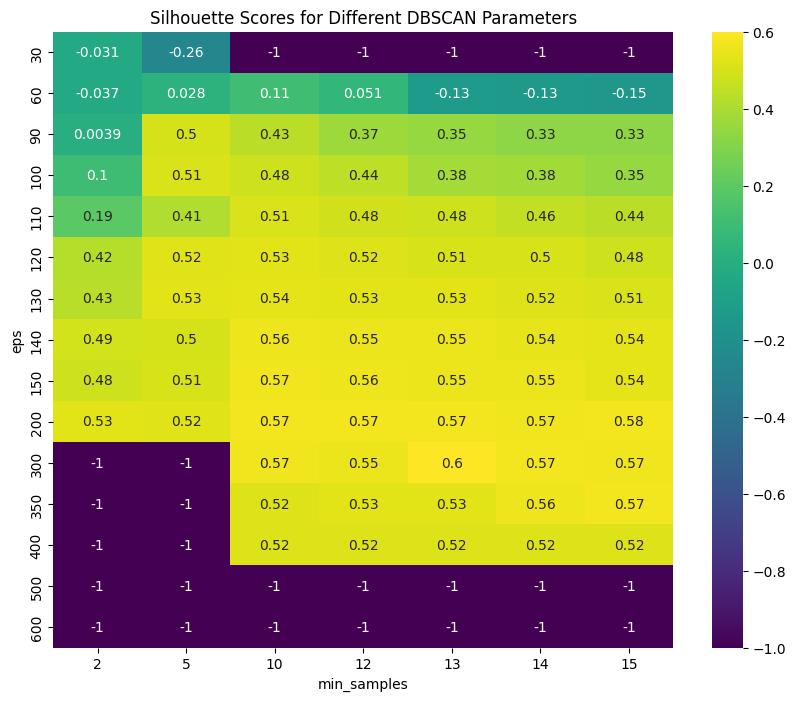

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [30, 60, 90, 100, 110, 120 , 130 , 140 , 150 , 200 , 300 , 350, 400 , 500 , 600]
min_samples_values = [2, 5, 10,12, 13  , 14, 15 ]

silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_reduced_pca)

        if len(np.unique(clusters)) > 1 and np.count_nonzero(clusters != -1) > 1:
            score = silhouette_score(features_reduced_pca, clusters)
        else:
            score = -1
        silhouette_scores[i, j] = score

plt.figure(figsize=(10, 8))
sns.heatmap(silhouette_scores, annot=True, cmap='viridis',
            xticklabels=min_samples_values, yticklabels=eps_values)
plt.title('Silhouette Scores for Different DBSCAN Parameters')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.show()


we can see that we can get max Silhouette Scores for Different DBSCAN Parameters in eps = 300 and min_samples = 13

as we can see we have this values in this tetst


eps_values = [30, 60, 90, 100, 110, 120 , 130 , 140 , 150 , 200 , 300 , 350, 400 , 500 , 600]

min_samples_values = [2, 5, 10,12, 13  , 14, 15 ]

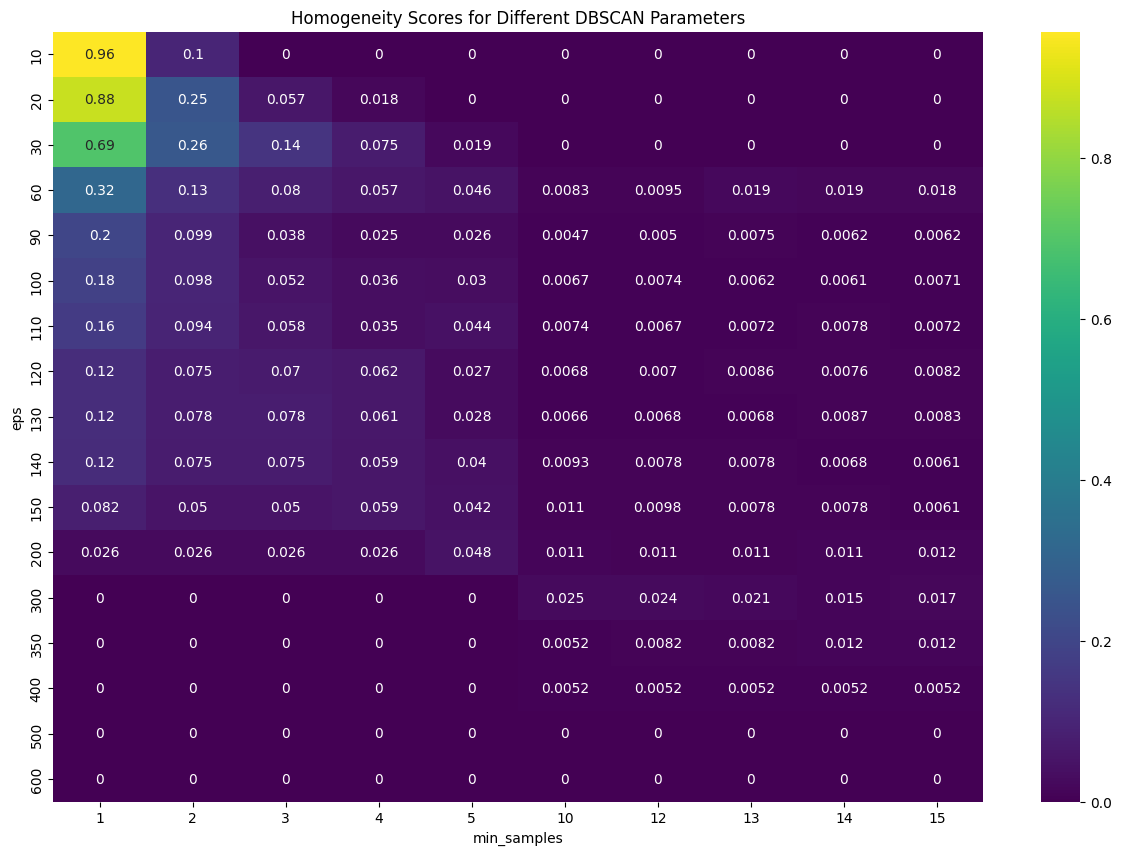

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import homogeneity_score

eps_values = [10 , 20 ,30, 60, 90, 100, 110, 120, 130, 140, 150, 200, 300, 350, 400, 500, 600]
min_samples_values = [1, 2 , 3,4, 5, 10, 12, 13, 14, 15]
homogeneity_scores = np.zeros((len(eps_values), len(min_samples_values)))
for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(features_reduced_pca)
        if len(np.unique(clusters)) > 1 and np.count_nonzero(clusters != -1) > 1:
            score = homogeneity_score(labels['label'], clusters)
        else:
            score = 0
        homogeneity_scores[i, j] = score

plt.figure(figsize=(15, 10))
sns.heatmap(homogeneity_scores, annot=True, cmap='viridis',
            xticklabels=min_samples_values, yticklabels=eps_values)
plt.title('Homogeneity Scores for Different DBSCAN Parameters')
plt.xlabel('min_samples')
plt.ylabel('eps')
plt.show()

as we can see we get some bad values in this plut
becuese of max of this scroe is with one cluster


# Display the images in each cluster by this function

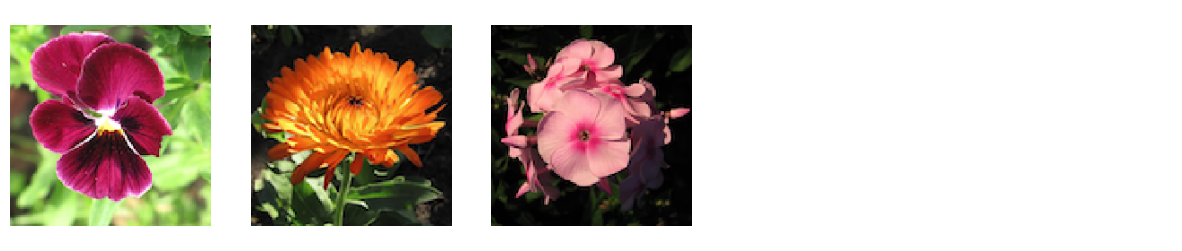

In [152]:
cluster_id_to_display = 9
display_images_from_cluster(cluster_id_to_display, clusters_DBSCAN, img_dir)


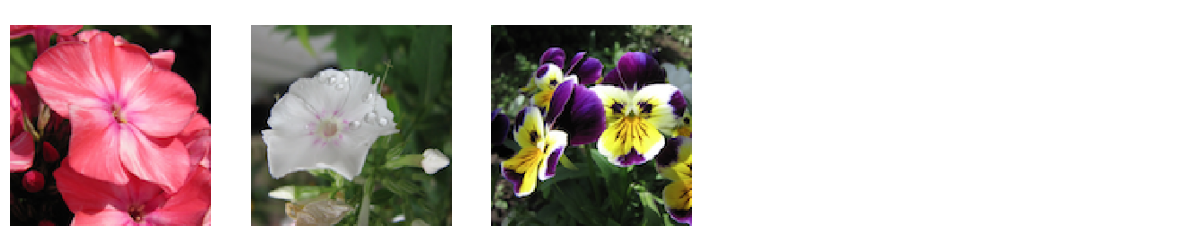

In [153]:
cluster_id_to_display = 10
display_images_from_cluster(cluster_id_to_display, clusters_DBSCAN, img_dir)


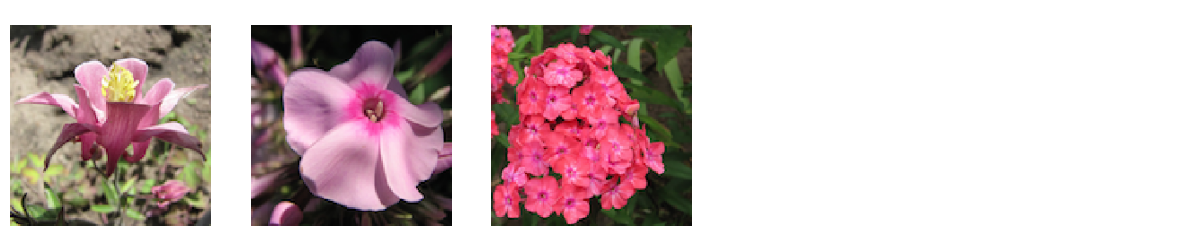

In [146]:
cluster_id_to_display = 5
display_images_from_cluster(cluster_id_to_display, clusters_DBSCAN, img_dir)


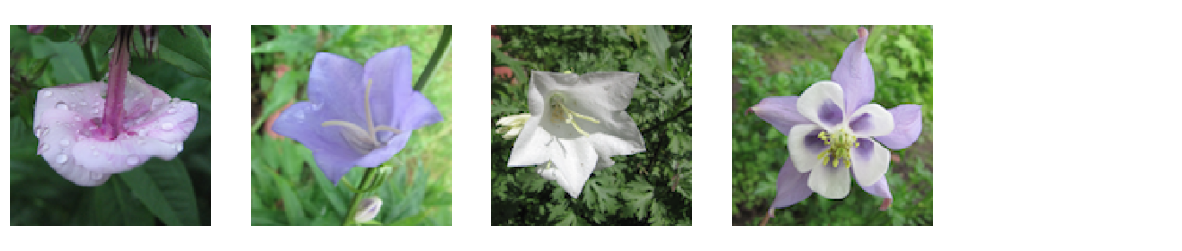

In [148]:
cluster_id_to_display = 7
display_images_from_cluster(cluster_id_to_display, clusters_DBSCAN, img_dir)


# calculate the silhouette and homogeneity scores for the DBSCAN clustering algorithm

In [154]:

from sklearn.metrics import homogeneity_score
homogeneity = homogeneity_score(labels['label'], clusters_DBSCAN)

from sklearn.metrics import silhouette_score
silhouette = silhouette_score(features_reduced_pca, clusters_DBSCAN)

print(f'Homogeneity Score: {homogeneity}')
print(f'Silhouette Score: {silhouette}')



Homogeneity Score: 0.14359702565480872
Silhouette Score: -0.14187020063400269


# How Homogeneity Score Works

- **Definition**: A clustering result satisfies **homogeneity** if all of its clusters contain only data points which are members of a single class.
- **Calculation**: The score is calculated based on the conditional entropy of the classes given the cluster assignments, normalized such that a score of 1 means perfectly homogeneous labeling (no clusters contain data points from different classes), and a score of 0 indicates that the clustering is not homogeneous at all.

### Formula
The homogeneity score, \( H \), can be defined mathematically as:
\[ H = 1 - \frac{H(C|K)}{H(C)} \]
where:
- \( H(C|K) \) is the conditional entropy of the class distribution given the predicted clusters.
- \( H(C) \) is the entropy of the class distribution.
- If \( H(C) = 0 \) (i.e., there is only one class), the homogeneity is defined to be 1.

### Interpretation
- **1.0**: Perfect homogeneity (each cluster contains only members of a single class).
- **0.0**: No homogeneity at all (clusters are randomly assigned without considering class membership).

### Implementation in Scikit-Learn
Scikit-learn provides an easy-to-use function to compute the homogeneity score:
```python
from sklearn.metrics import homogeneity_score

homogeneity = homogeneity_score(true_labels, predicted_labels)
```
Where `true_labels` are the actual class labels and `predicted_labels` are the labels assigned by your clustering algorithm.

### Deploying Homogeneity Score Calculation in the Cloud

To deploy a homogeneity score calculation in a cloud environment, you generally need to consider:
1. **Data Storage**: Your datasets (features and true labels) need to be accessible in the cloud. This might mean storing them in a cloud-based storage solution like AWS S3, Google Cloud Storage, or Azure Blob Storage.
2. **Computational Resources**: Depending on the size of your dataset, you might need scalable compute resources to perform clustering and calculate scores. Cloud providers offer scalable computing resources like AWS EC2 instances, Google Compute Engine, or Azure Virtual Machines.
3. **Service Deployment**: You can deploy your clustering analysis as a service using cloud services like AWS Lambda, Google Cloud Functions, or Azure Functions for serverless computing, which can trigger on-demand.
4. **APIs**: For applications needing real-time analysis, you might expose your clustering service through an API using Amazon API Gateway, Google Cloud Endpoints, or Microsoft Azure API Management.
5. **Security and Compliance**: Ensure that your deployment complies with relevant data protection regulations (like GDPR, HIPAA, etc.), especially when handling sensitive or personal data.




# How Silhouette Score Works

The silhouette score for each sample is calculated using the following formula:

\[ s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))} \]

where:
- \( a(i) \) is the **mean intra-cluster distance** for the \( i \)-th sample, which is the average distance between the \( i \)-th sample and all other points in the same cluster.
- \( b(i) \) is the **mean nearest-cluster distance** for the \( i \)-th sample, which is the smallest average distance to all points in any other cluster, of which the \( i \)-th sample is not a member.

### Interpretation of Scores
- The silhouette score for a set of samples is given as the mean of the silhouette scores for each sample.
- A score close to **+1** indicates that the sample is far away from the neighboring clusters.
- A score of **0** indicates that the sample is on or very close to the decision boundary between two neighboring clusters.
- A score close to **-1** indicates that the sample is placed in the wrong cluster.

### Benefits of Silhouette Score
- **Clarity**: It provides a clear measurement to represent how well-separated the clusters are.
- **Application**: Useful for determining the optimal number of clusters in a dataset.
- **Versatility**: It does not require labeled data and purely relies on the geometric properties of the data, making it applicable to any dataset where distance metrics can be calculated.

### Implementation in Scikit-Learn
You can calculate the silhouette score in Python using Scikit-learn's `silhouette_score` function:

Where `features` is your dataset and `cluster_labels` are the labels assigned by the clustering algorithm.

### Practical Example of Use
If you are experimenting with different values of `k` in k-means clustering, you can compute the silhouette score for each value of `k` to determine which provides the most distinct clustering, as demonstrated in the previous responses.

### Deployment Considerations
Similar to deploying the homogeneity score in a cloud environment, you would ensure that the silhouette score computation can be part of a scalable pipeline, possibly involving:
- Cloud-based computation platforms for handling large datasets.
- APIs for triggering silhouette score calculations.
- Storing and retrieving results in a cloud database or storage service.



# now work with normmalization :


this are some samples of clustring with some normalization and preprossesing funxtions :

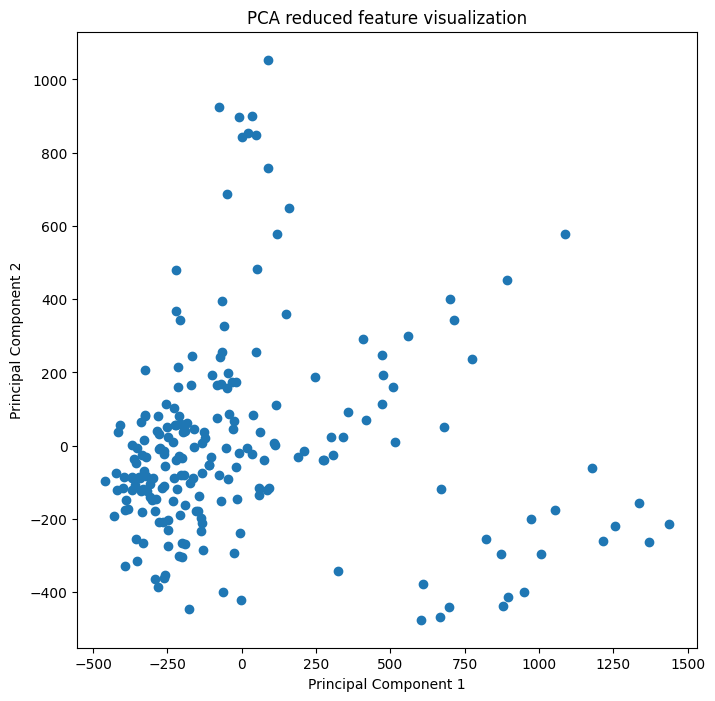

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_pca[:, 0], features_reduced_pca[:, 1])
plt.title("PCA reduced feature visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## StandardScaler

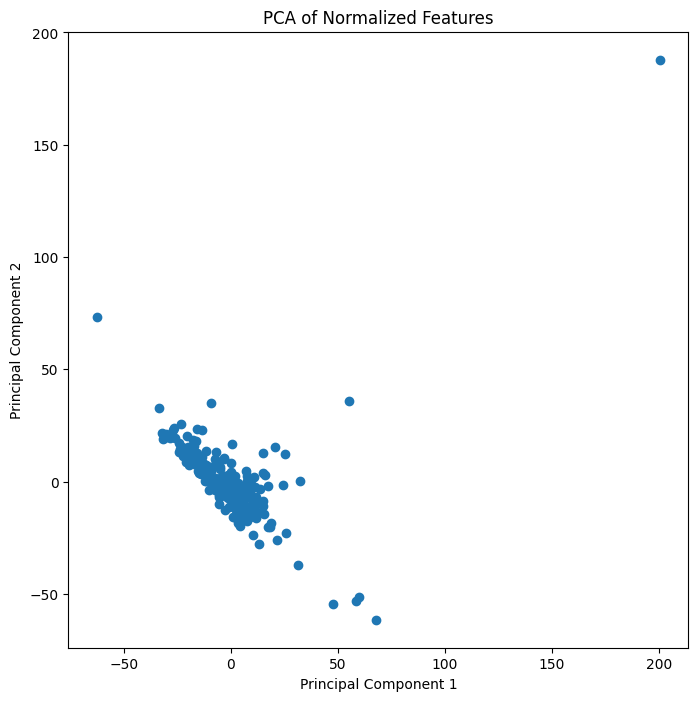

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


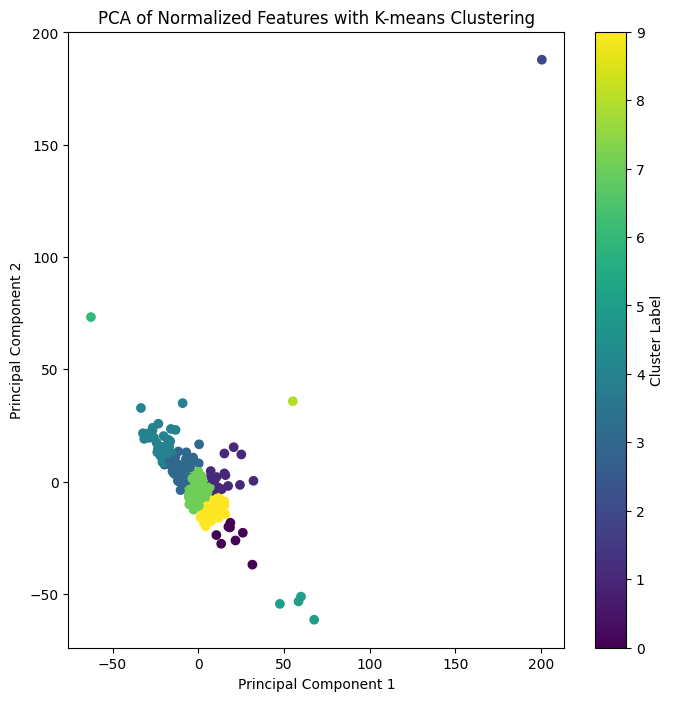

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features_normalized)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_pca[:, 0], features_reduced_pca[:, 1])
plt.title("PCA of Normalized Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(features_reduced_pca)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_pca[:, 0], features_reduced_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA of Normalized Features with K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


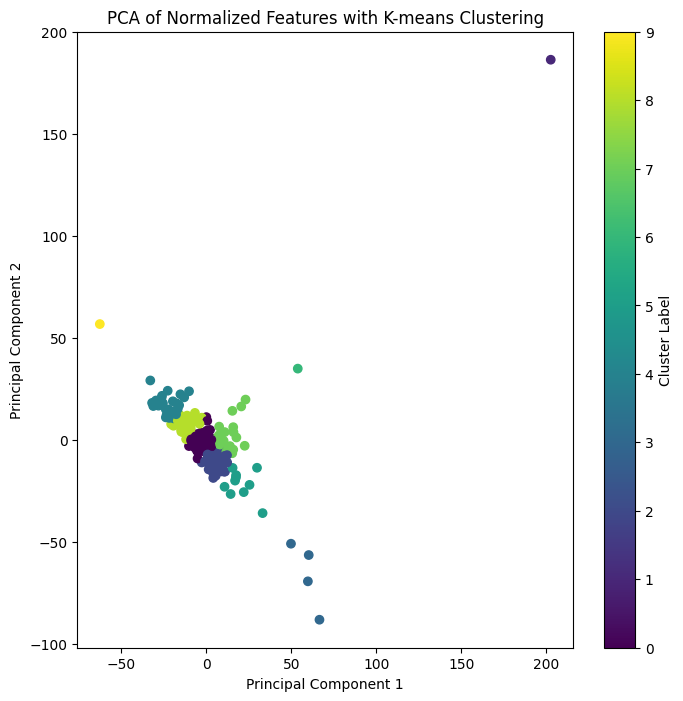

Homogeneity Score: 0.07289928997424712
Silhouette Score: 0.38023442


In [80]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt


scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features_normalized)

kmeans = KMeans(n_clusters=10)
clusters = kmeans.fit_predict(features_reduced_pca)

homogeneity = homogeneity_score(labels['label'], clusters)
silhouette = silhouette_score(features_reduced_pca, clusters)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_pca[:, 0], features_reduced_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA of Normalized Features with K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

print("Homogeneity Score:", homogeneity)
print("Silhouette Score:", silhouette)


## IsolationForest and Normalizer


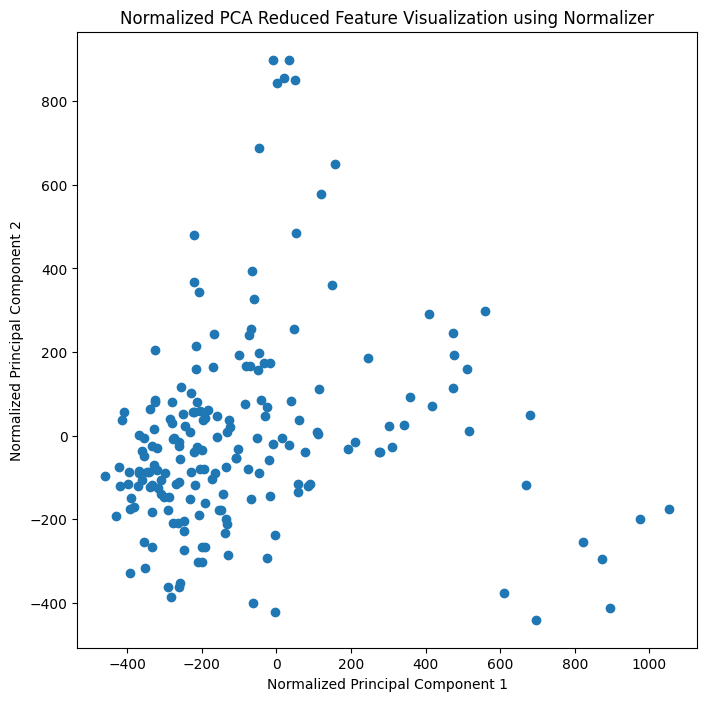

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 3 1 1 1 3 0 1 1 1 3 3 1 1 3 1 3 3 0 1 0 1 1 1 3 3 1 3 3 3 3 1 0 3 1 1 3
 3 0 3 1 2 3 3 3 2 3 0 0 2 3 3 0 1 3 2 2 1 3 3 1 3 1 3 3 3 0 3 3 1 1 3 1 3
 3 3 3 3 0 3 1 3 3 1 3 0 0 3 0 3 2 1 1 1 2 3 1 3 3 3 3 1 3 3 2 1 3 0 3 0 1
 3 3 1 3 3 1 1 3 3 1 3 3 0 1 3 3 3 3 1 0 2 3 1 3 3 2 1 1 1 1 3 3 3 3 3 3 3
 3 0 3 3 3 1 1 1 1 3 0 3 3 1 0 1 1 1 1 3 3 1 2 0 3 3 1 3 1 0 1 1 2 3 1 3 1
 3 0 3 3]


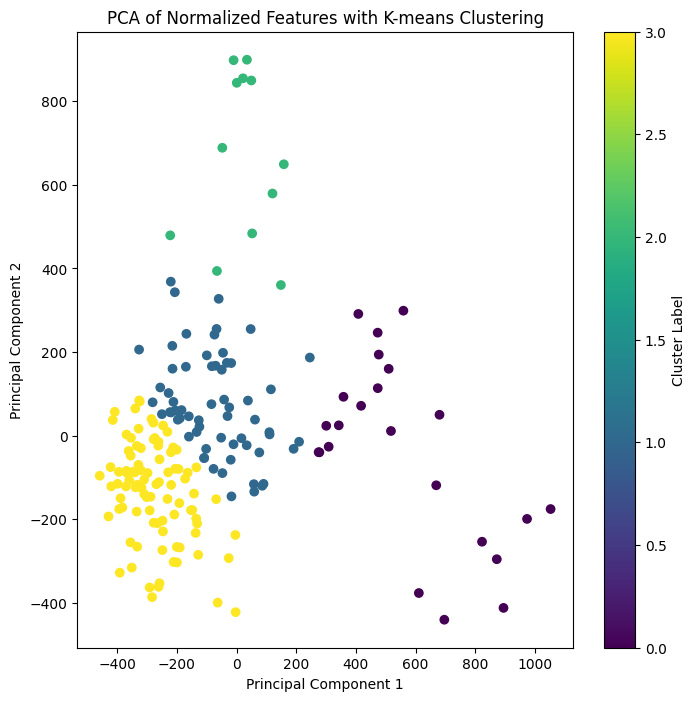

Homogeneity Score: 0.07289928997424712
Silhouette Score: 0.38023442


In [81]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)


normalizer = Normalizer()

from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1)
outliers = iso_forest.fit_predict(features_reduced_pca)

features_reduced_normalized = features_reduced_pca[outliers != -1]

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_normalized[:, 0], features_reduced_normalized[:, 1])
plt.title("Normalized PCA Reduced Feature Visualization using Normalizer")
plt.xlabel("Normalized Principal Component 1")
plt.ylabel("Normalized Principal Component 2")
plt.show()


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(features_reduced_normalized)

print(clusters)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_normalized[:, 0], features_reduced_normalized[:, 1], c=clusters, cmap='viridis')
plt.title("PCA of Normalized Features with K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()
print("Homogeneity Score:", homogeneity)
print("Silhouette Score:", silhouette)



## plot

IsolationForest and Normalizer preprossesing silhouette_scores and homogeneity_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

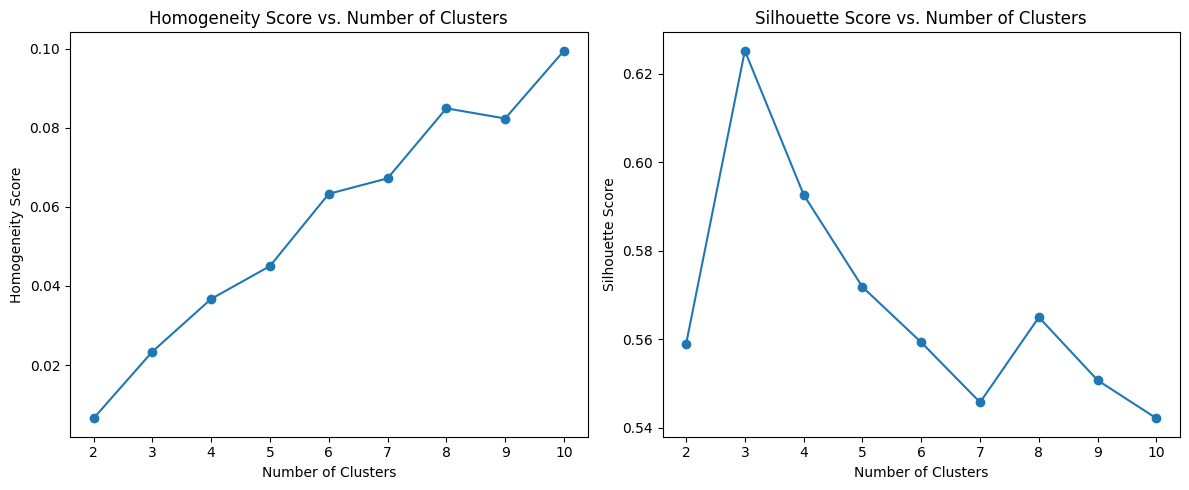

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(features_reduced_pca)

features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]

normalizer = Normalizer()
features_reduced_normalized = normalizer.fit_transform(features_reduced_pca)

k_values = range(2, 11)
homogeneity_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(features_reduced_normalized)
    homogeneity = homogeneity_score(labels_true_filtered, clusters)
    silhouette = silhouette_score(features_reduced_normalized, clusters)

    homogeneity_scores.append(homogeneity)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## plot

MinMaxScaler and IsolationForest preprossesing
silhouette_scores and homogeneity_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

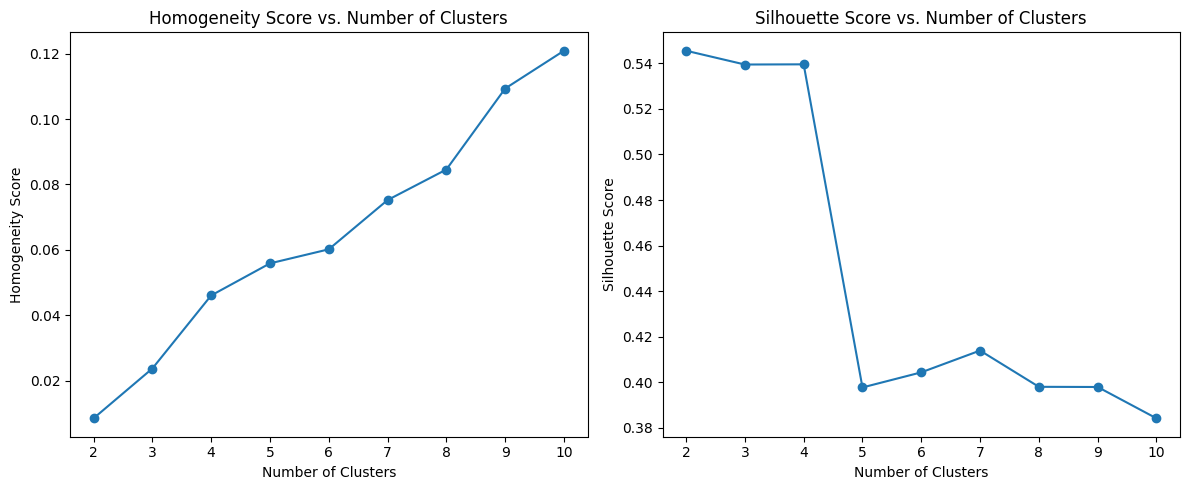

In [83]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(features_reduced_pca)

features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]

scaler = MinMaxScaler()
features_reduced_normalized = scaler.fit_transform(features_reduced_pca)

k_values = range(2, 11)
homogeneity_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(features_reduced_normalized)
    homogeneity = homogeneity_score(labels_true_filtered, clusters)
    silhouette = silhouette_score(features_reduced_normalized, clusters)

    homogeneity_scores.append(homogeneity)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## plot

RobustScaler and PowerTransformer and IsolationForest preprossesing
silhouette_scores and homogeneity_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

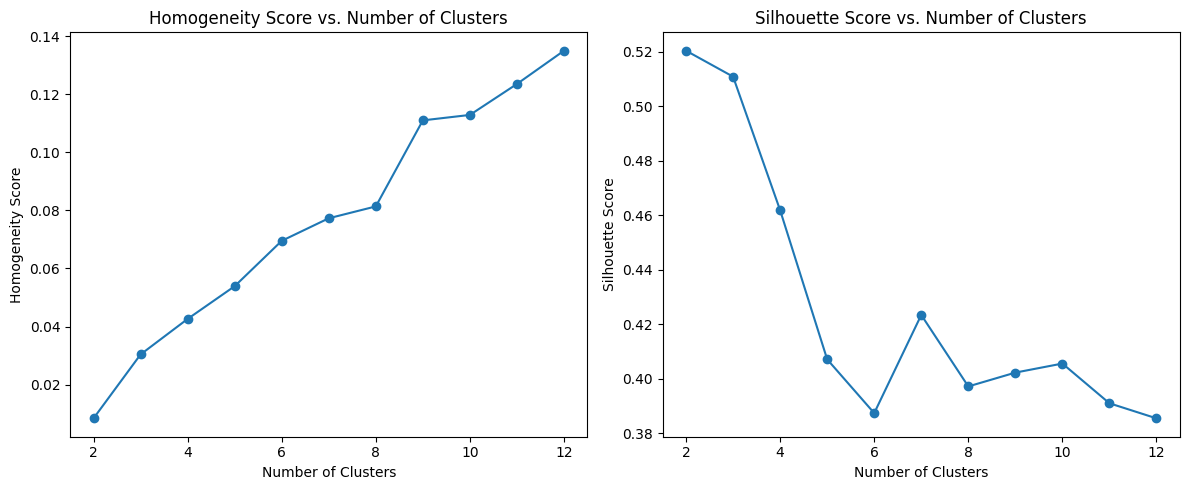

In [84]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler, PowerTransformer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(features_reduced_pca)

features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]

scaler = RobustScaler()
features_reduced_normalized = scaler.fit_transform(features_reduced_pca)

k_values = range(2, 13)
homogeneity_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(features_reduced_normalized)
    homogeneity = homogeneity_score(labels_true_filtered, clusters)
    silhouette = silhouette_score(features_reduced_normalized, clusters)

    homogeneity_scores.append(homogeneity)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


 PCA for dimensionality reduction on a dataset, removes outliers using Isolation Forest, and normalizes the remaining data with a Quantile Transformer. It then applies K-means clustering for different cluster counts (from 2 to 10), computes homogeneity and silhouette scores to evaluate clustering effectiveness, and visualizes these scores to help identify the optimal number of clusters for the dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (199). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The 

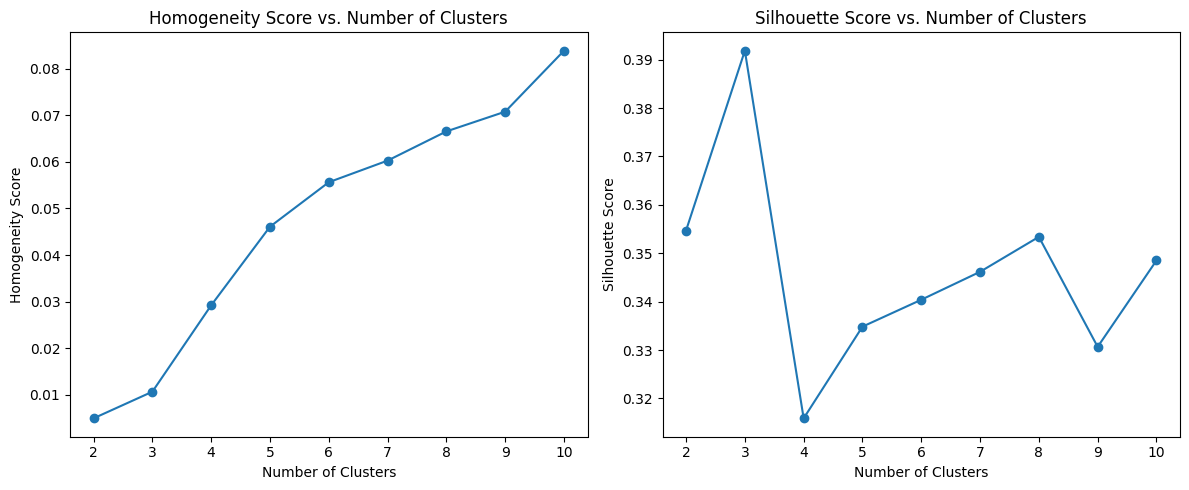

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np


pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(features_reduced_pca)

features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]


quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
features_reduced_normalized = quantile_transformer.fit_transform(features_reduced_pca)

k_values = range(2, 11)
homogeneity_scores = []
silhouette_scores = []


for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(features_reduced_normalized)
    homogeneity = homogeneity_score(labels_true_filtered, clusters)
    silhouette = silhouette_score(features_reduced_normalized, clusters)

    homogeneity_scores.append(homogeneity)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## Clustering Analysis Pipeline: PCA, Outlier Removal, and Cluster Evaluation with scikit-learn

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (199). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The 

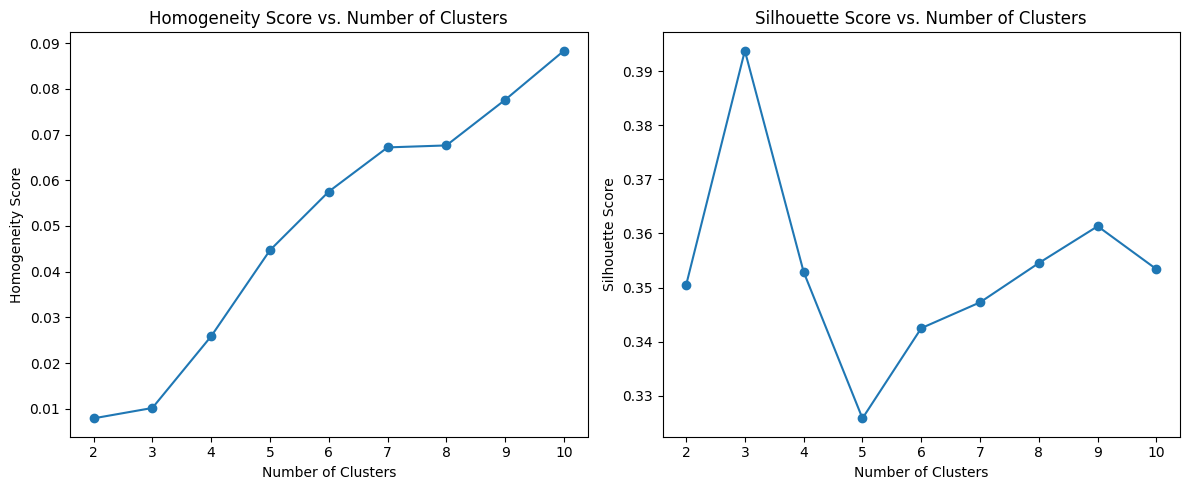

In [86]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features)

iso_forest = IsolationForest(contamination=0.05)
outliers = iso_forest.fit_predict(features_reduced_pca)

features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]

quantile_transformer = QuantileTransformer(output_distribution='normal')
features_reduced_normalized = quantile_transformer.fit_transform(features_reduced_pca)

k_values = range(2, 11)
homogeneity_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(features_reduced_normalized)
    homogeneity = homogeneity_score(labels_true_filtered, clusters)
    silhouette = silhouette_score(features_reduced_normalized, clusters)

    homogeneity_scores.append(homogeneity)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## Data Clustering Pipeline: Normalization, PCA, Outlier Removal, and Clustering Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (210). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.3816233


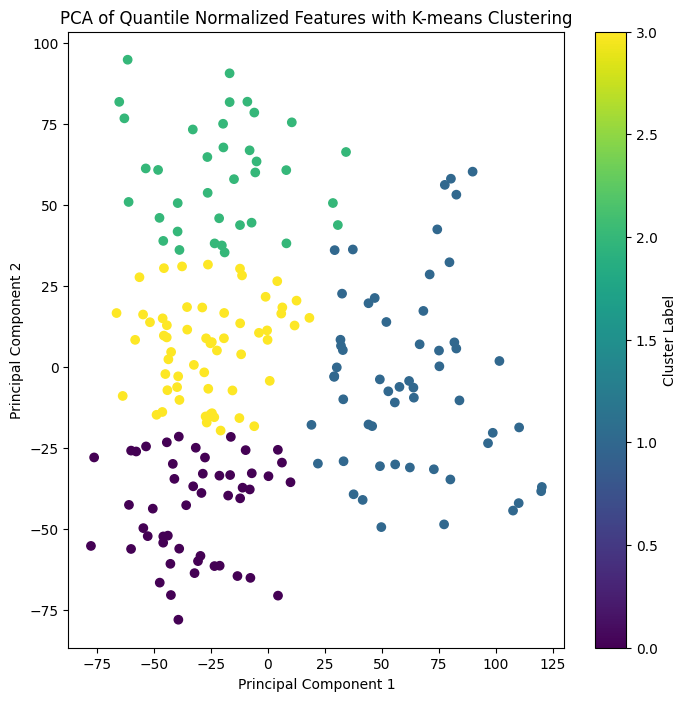

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import QuantileTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest


quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=0)
features_quantile_transformed = quantile_transformer.fit_transform(features)

pca = PCA(n_components=2)
features_reduced_pca = pca.fit_transform(features_quantile_transformed)

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(features_reduced_pca)
features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]

kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(features_reduced_pca)

silhouette = silhouette_score(features_reduced_pca, clusters)
print("Silhouette Score:", silhouette)

plt.figure(figsize=(8, 8))
plt.scatter(features_reduced_pca[:, 0], features_reduced_pca[:, 1], c=clusters, cmap='viridis')
plt.title("PCA of Quantile Normalized Features with K-means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()


## Advanced Clustering Pipeline with Normalization, PCA Reduction, and Performance Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

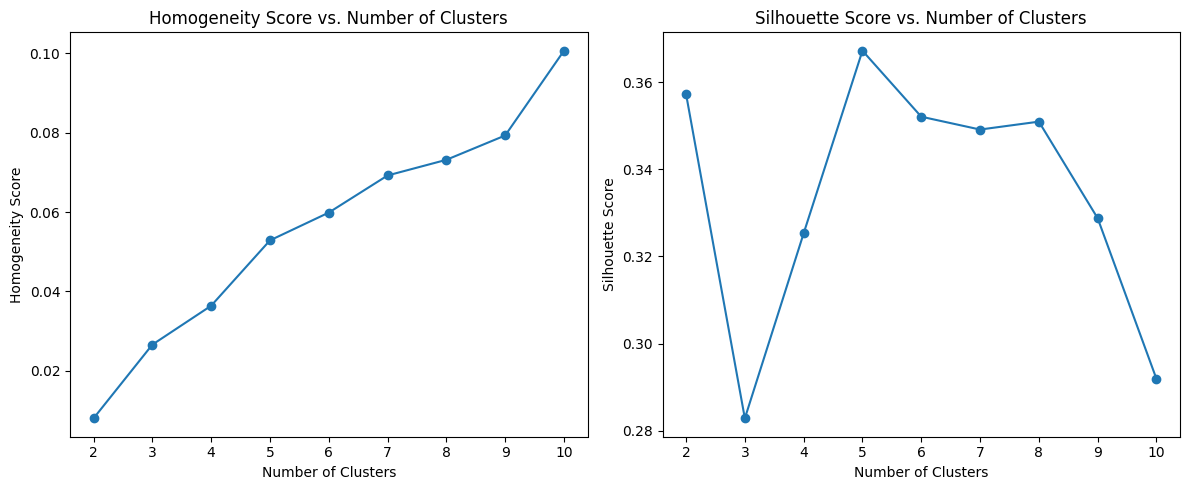

In [88]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer, QuantileTransformer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, silhouette_score
import matplotlib.pyplot as plt
import numpy as np


normalizer = Normalizer()
features_normalized = normalizer.fit_transform(features)

pca = PCA(n_components=4)
features_reduced_pca = pca.fit_transform(features_normalized)



features_reduced_pca = features_reduced_pca[outliers != -1]
labels_true_filtered = labels['label'][outliers != -1]

k_values = range(2, 11)
homogeneity_scores = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(features_reduced_pca)
    homogeneity = homogeneity_score(labels_true_filtered, clusters)
    silhouette = silhouette_score(features_reduced_pca, clusters)

    homogeneity_scores.append(homogeneity)
    silhouette_scores.append(silhouette)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, homogeneity_scores, marker='o')
plt.title('Homogeneity Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Homogeneity Score')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


# Questions

1. Why we extract features from the images and not use the images directly? Explain it in detail.

Feature extraction is a critical step in image processing and computer vision. While raw pixel values can be used directly for some applications, they often don't capture the high-level patterns necessary for tasks like image classification, object detection, or image retrieval. Feature extraction allows us to:

Reduce Dimensionality: Images, especially high-resolution ones, contain millions of pixels. Processing this data directly is computationally expensive and inefficient. Feature extraction helps reduce dimensionality, focusing on the most informative aspects of the image data.
Capture Important Patterns: Pre-trained CNNs like VGG16 are adept at capturing hierarchical patterns in images. Early layers may detect edges and textures, while deeper layers can identify more complex structures like parts of objects or entire objects. This hierarchical feature extraction is crucial for tasks requiring high-level understanding of image content.
Improve Performance: Features extracted by models like VGG16, trained on large datasets (e.g., ImageNet), can significantly improve the performance of downstream tasks, even with limited data. This transfer learning approach leverages the generic patterns learned by the network, making it adaptable to a wide range of tasks beyond its original training objective.





2. Techniques for Feature Extraction from Images ? explain 3 of them.

for feature extraction from images we can use different techniques. some of them are:
- Edge Detection (e.g., Sobel, Canny): This involves identifying sharp changes in intensity in an image. Edges can signify boundaries of objects, making this technique useful for tasks like object detection and image segmentation.
- Texture Analysis: Texture features capture the spatial arrangement of colors or intensities in an image and can be used to classify regions or objects within an image based on surface patterns.
- Deep Learning (e.g., using VGG16): Deep learning approaches, especially using CNNs, automatically learn to extract features that are highly predictive of the task at hand (e.g., image classification). By removing the fully connected layers of VGG16, you can use the convolutional layers as a feature extractor, capturing complex patterns that are not feasible with manual techniques.





3. Preprocessing Required Before Feeding Images into the Model ?

- Resize Images: VGG16, like many CNNs, requires input images to be of a specific size (e.g., 224x224 pixels). Resizing images ensures they meet this requirement.
- Normalize Pixel Values: Typically, pixel values are normalized to a range that the model was originally trained on. For VGG16, input images should be normalized by subtracting the mean RGB values (calculated over the training set of the original dataset) from each pixel.
- Format Conversion: Images should be converted to the format expected by the model (e.g., converting from RGBA to RGB if the model does not support alpha channels).

# Part 2 : Dimensionality Reduction

# Introduction about Dimensionality Reduction


Dimensionality reduction is a crucial technique in data processing and machine learning that aims to decrease the number of random variables under consideration, without significantly losing valuable information. This process is particularly useful when dealing with high-dimensional data, such as images, text, or genetic data. Dimensionality reduction can improve the performance of machine learning algorithms, reduce computational costs, and help with data visualization by lowering the complexity of the data.

- Why is Dimensionality Reduction Important?
. Curse of Dimensionality: High-dimensional spaces introduce various challenges, such as increased computational cost and the need for exponentially more data to maintain the same level of model performance, which dimensionality reduction techniques can mitigate.
Noise Reduction: By focusing on the most informative features, dimensionality reduction can also help eliminate noise from the data, potentially improving the performance of machine learning models.

. Improved Interpretability: Lower-dimensional data is easier to interpret and visualize, making it easier to identify patterns, trends, and outliers.
Common Techniques for Dimensionality Reduction:
Principal Component Analysis (PCA): PCA is a statistical procedure that uses orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. The first principal component has the highest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components.
t-Distributed Stochastic Neighbor Embedding (t-SNE): t-SNE is a machine learning algorithm for visualization developed by Laurens van der Maaten and Geoffrey Hinton. It is particularly well suited for the visualization of high-dimensional datasets. It converts similarities between data points to joint probabilities and tries to minimize the Kullback–Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.

. Linear Discriminant Analysis (LDA): LDA is a method used in statistics, pattern recognition, and machine learning to find the linear combination of features that characterizes or separates two or more classes of objects or events. It is commonly used as a dimensionality reduction technique in the pre-processing step for pattern-classification and machine learning applications.

. Autoencoders: An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data. The coding is a compressed representation of the input. Autoencoders are trained to minimize reconstruction errors (such as mean squared error) between the input data and the reconstructed data from the compressed representation.

# Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a statistical procedure that transforms a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. It's one of the most widely used techniques for dimensionality reduction in data analysis and machine learning.

### How PCA Works:

1. **Standardization:** Initially, the data is standardized to have a mean of 0 and a standard deviation of 1. This is important because PCA is sensitive to the variances of the initial variables.

2. **Covariance Matrix Computation:** PCA computes the covariance matrix of the data to understand how the variables of the input data are varying from the mean with respect to each other.

3. **Eigenvalue Decomposition:** The covariance matrix is then decomposed into its eigenvalues and eigenvectors. Eigenvectors determine the directions of the new feature space, and eigenvalues determine their magnitude. In essence, the eigenvectors represent the principal components (the directions of maximum variance), while the eigenvalues represent the importance of each principal component.

4. **Selection of Principal Components:** The eigenvectors are sorted by their eigenvalues in descending order. The number of eigenvectors selected is based on the number of dimensions we want to reduce our data to. This selection is often made by looking at the cumulative explained variance ratio, which indicates how much information (variance) is captured by the first N principal components.

5. **Transformation:** The original data is then projected onto the leading eigenvectors (the principal components selected), resulting in a new dataset of significantly reduced dimensions.

### Applications of PCA:

- **Data Visualization:** When data is reduced to two or three dimensions, it can be easily plotted, allowing for visual inspection of the data to identify patterns, clusters, or outliers.

- **Noise Reduction:** By eliminating components with lower variance and keeping only the significant components, PCA can help in reducing noise in the dataset.

- **Feature Extraction and Data Compression:** PCA is used to unearth the underlying variables that explain the patterns in the data. It also helps in data compression by reducing the number of dimensions without losing much information.

### Advantages:

- **Simplicity:** PCA is a straightforward and non-parametric method of extracting relevant information from confusing data sets.
- **Versatility:** It can be applied to data from any field, including finance, social sciences, and physical sciences.

### Disadvantages:

- **Linearity:** PCA assumes that the principal components are a linear combination of the original features. If the relationship is nonlinear, PCA might not capture the essence of the data effectively.
- **Sensitivity to Scale:** PCA is affected by the scale of the variables; hence, variables need to be scaled before applying PCA.

In summary, PCA is a powerful tool for analyzing data, reducing dimensions, removing multicollinearity, and assisting in exploratory data analysis and predictive modeling.

# Last Questions

1. explain how silhouette and homogeneity scores are calculated and what they represent?

The silhouette score and homogeneity are metrics used to evaluate the performance of clustering algorithms. They offer insight into the quality of the clustering process, helping to understand how well each object lies within its cluster and how pure the clusters are. Here's an overview of how each metric is calculated:

### Silhouette Score

The silhouette score measures how similar an object is to its own cluster compared to other clusters. The value ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If the majority of the objects have a high value, the clustering configuration is good.

The silhouette score for a single sample is given by:

\[ s = \frac{b - a}{max(a, b)} \]

where:
- \(a\) is the mean distance between a sample and all other points in the same cluster.
- \(b\) is the smallest mean distance from the sample to all points in any other cluster, of which the sample is not a part.

The silhouette score of the entire dataset is the average of all the individual silhouette scores.

### Homogeneity

Homogeneity is a metric that evaluates if each cluster contains only members of a single class. A clustering result satisfies homogeneity if all of its clusters contain only data points that are members of a single class. Homogeneity score ranges from 0 to 1, where 1 stands for perfectly homogeneous clustering.

To compute homogeneity, let \(C\) be the set of clusters and \(K\) the set of classes. The homogeneity score is defined as:

\[ h = 1 - \frac{H(C|K)}{H(C)} \]

where:
- \(H(C|K)\) is the conditional entropy of the clusters given the class - this measures how much entropy remains if you were to try to predict the class of each point given its cluster.
- \(H(C)\) is the entropy of the clusters - this measures how evenly the clustering has spread out points among the clusters without regard to the class labels.

A homogeneity score of 1 means the clustering perfectly assigns all members of a single class to a single cluster, whereas a score closer to 0 indicates poor homogeneity, with many different classes being mixed within a cluster.

Both of these metrics provide valuable insights for evaluating clustering algorithms, helping in the selection of the model that best fits the underlying data.


10. Improving the performance of machine learning models

Improving the performance of models for clustering images specifically involves techniques tailored to dealing with high-dimensional data and extracting meaningful features from images. Here are strategies to enhance clustering performance in image datasets:

### 1. **Feature Extraction Using Deep Learning**

- **Pre-trained Models:** Leverage pre-trained CNNs (Convolutional Neural Networks) like VGG, ResNet, or Inception as feature extractors. These models, trained on large datasets like ImageNet, can capture complex patterns in images. Remove the top layer (classification layer), use the model to process your images, and use the output from one of the deeper layers as features for clustering.

- **Autoencoders:** Train autoencoders on your image dataset. An autoencoder learns to compress (encode) the image into a lower-dimensional space and then reconstruct (decode) it back. The encoded representation captures the essence of the images and can be used for clustering.

### 2. **Optimizing Image Preprocessing**

- **Normalization:** Scale pixel values to a standard range, typically [0, 1] or [-1, 1], to reduce disparities in illumination and improve model convergence.
  
- **Dimensionality Reduction:** Apply PCA or t-SNE to the extracted features to reduce dimensionality further while retaining the variance in the data. This can make clustering more efficient and often more effective.

- **Data Augmentation:** Generate new images by applying transformations (rotation, scaling, flipping) to your dataset. This can help in creating a more diverse set of features for clustering, though it's more commonly used in supervised learning.

### 3. **Choosing the Right Clustering Algorithm**

- **Experiment with Algorithms:** Beyond traditional K-means, explore algorithms better suited for high-dimensional data, like Spectral Clustering or DBSCAN. These algorithms can sometimes capture complex patterns and clusters in image data more effectively than K-means.

- **Hyperparameter Tuning:** For each clustering algorithm, optimize its parameters. For example, in K-means, this could be the number of clusters. In DBSCAN, this might involve the minimum samples per cluster and the epsilon parameter that defines the neighborhood size.

### 4. **Evaluation and Iteration**

- **Silhouette Score:** Use silhouette scores to assess the quality of clusters created. This can guide you in choosing the right number of clusters or adjusting other hyperparameters.
  
- **Elbow Method:** For algorithms like K-means, use the elbow method to determine the optimal number of clusters by plotting the variance explained as the number of clusters increases and finding the "elbow" point.

### 5. **Advanced Techniques**

- **Deep Clustering:** Explore deep clustering approaches that combine feature learning and clustering into a single end-to-end learning process. Models like Deep Embedded Clustering (DEC) or Deep Clustering Network (DCN) can simultaneously learn features and cluster assignments, potentially leading to better performance.

- **Ensemble Clustering:** Combine multiple clustering algorithms or the same algorithm with different hyperparameters to create an ensemble. The final cluster assignment can be determined by majority vote or another consensus function.

Improving clustering performance, especially in the context of images, requires careful consideration of both the feature space and the clustering algorithm. Experimentation and validation are key to finding the best approach for your specific dataset.
